In [4]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    # 특정 GPU에 1GB 메모리만 할당하도록 제한
    try:
        tf.config.experimental.set_visible_devices(gpus[1], 'GPU')
        tf.config.experimental.set_virtual_device_configuration(
            gpus[1],
            [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=1048)])
    except RuntimeError as e:
    # 프로그램 시작시에 가상 장치가 설정되어야만 합니다
        print(e)

In [14]:
%reset

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

train_dir = './data/cat_dog_full/train'
validation_dir = './data/cat_dog_full/validation'

# 전체데이터가 총 25000개
# dogs 이미지가 12500개
# dogs 이미지 중 train set : 7000
# dogs 이미지 중 validation set : 3000
# dogs 이미지 중 test set : 2500
# ImageDataGenerator를 생성
# 이미지 데이터의 값을 1/255로 scaling
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# train data를 가져오면 => x_data(독립변수,픽셀데이터), t_data(종속변수,label)
train_generator = train_datagen.flow_from_directory(
    train_dir,                # taget directory : 데이터를 어디에서 가져올건가요!
    classes=['cats', 'dogs'], # label적용을 어떻게 할건가요? 순서대로 레이블이 적용
                              # cats : 0, dogs : 1  (cats와 dogs는 폴더명!!)
                              # 만약 classes를 명시하지 않으면 폴더명 순서로 label이 잡혀요!   
    target_size=(150,150),    # 이미지 size scaling(크기를 150x150으로 변경해서 들고와!!)
    batch_size=20,            # 한번에 20개의 이미지를 가져와!!  
                              # label에 상관없이 가져와요!!
    class_mode='binary'       # 이진분류이기 때문에 'binary'
                              # 만약 MNIST처럼 다중분류면 'categorical'
                              # 기본값은 'categorical'
    )

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,           # taget directory : 데이터를 어디에서 가져올건가요!
    classes=['cats', 'dogs'], # label적용을 어떻게 할건가요? 순서대로 레이블이 적용
                              # cats : 0, dogs : 1  (cats와 dogs는 폴더명!!)
                              # 만약 classes를 명시하지 않으면 폴더명 순서로 label이 잡혀요!   
    target_size=(150,150),    # 이미지 size scaling(크기를 150x150으로 변경해서 들고와!!)
    batch_size=20,            # 한번에 20개의 이미지를 가져와!!  
                              # label에 상관없이 가져와요!!
    class_mode='binary'       # 이진분류이기 때문에 'binary'
                              # 만약 MNIST처럼 다중분류면 'categorical'
                              # 기본값은 'categorical'
    )

# 모델 생성

with tf.device('/device:GPU:1'):
    
    model = Sequential()
    model.add(Conv2D(filters=32, 
                     kernel_size=(3,3),
                     activation='relu', 
                     input_shape=(150,150,3)))
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=64, 
                     kernel_size=(3,3),
                     activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=128, 
                     kernel_size=(3,3),
                     activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters=256, 
                     kernel_size=(3,3),
                     activation='relu'))
    model.add(MaxPool2D(pool_size=(2,2)))

    model.add(Flatten())
    model.add(Dropout(0.5))
    model.add(Dense(units=512,
                    activation='relu'))
    
    model.add(Dense(units=1,
                    activation='sigmoid'))
#     print(model.summary())

    model.compile(optimizer=Adam(learning_rate=1e-4),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(train_generator,
                        steps_per_epoch=700,
                        epochs=30,
                        validation_data=validation_generator,
                        validation_steps=300)
    
model.save('./cat_dog_full_cnn_model.h5')

Once deleted, variables cannot be recovered. Proceed (y/[n])? y
Found 14000 images belonging to 2 classes.
Found 6000 images belonging to 2 classes.
Epoch 1/30
700/700 [==============================] - 95s 135ms/step - loss: 0.6211 - accuracy: 0.6430 - val_loss: 0.5243 - val_accuracy: 0.7408
Epoch 2/30
700/700 [==============================] - 87s 124ms/step - loss: 0.5010 - accuracy: 0.7521 - val_loss: 0.4549 - val_accuracy: 0.7810
Epoch 3/30
700/700 [==============================] - 88s 126ms/step - loss: 0.4352 - accuracy: 0.7993 - val_loss: 0.4309 - val_accuracy: 0.7965
Epoch 4/30
700/700 [==============================] - 89s 127ms/step - loss: 0.3906 - accuracy: 0.8263 - val_loss: 0.4213 - val_accuracy: 0.8113
Epoch 5/30
700/700 [==============================] - 89s 127ms/step - loss: 0.3581 - accuracy: 0.8398 - val_loss: 0.3742 - val_accuracy: 0.8303
Epoch 6/30
700/700 [==============================] - 89s 128ms/step - loss: 0.3240 - accuracy: 0.8595 - val_loss: 0.3669 - va

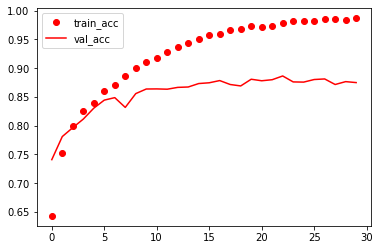

In [17]:
%matplotlib inline

import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(train_acc, 'bo', color='r', label='train_acc')
plt.plot(val_acc, 'b', color='r', label='val_acc')
plt.legend()
plt.show()